In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import loadtxt
from random import *
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
%matplotlib inline
import plotly.plotly as py
import cufflinks as cf

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

C:\Users\Neha Mane\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.

Using TensorFlow backend.


In [4]:
ClinicalDF = pd.read_csv('all_clinical.txt', sep='\t')

In [5]:
CibersortDF = pd.read_csv('CIBERSORT.Output_Job31.csv', sep=',')

In [6]:
ClinicalDF.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,A7,TUMOR FREE,Breast,A,Alive
1,1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,...,Sentinel node biopsy alone,NaN,NaN,NaN,Modified Radical Mastectomy,OL,TUMOR FREE,Breast,A,Alive
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
4,4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,BH,TUMOR FREE,Breast,A,Alive


In [7]:
CibersortDF.head()

,Input Sample,0,1,2,3,4,5,6,7,8,P-value,Pearson Correlation,RMSE
0,TCGA-3C-AAAU,0.000000,0.203059,0.000000,0.555870,0.127736,0.000000,0.000000,0.000000,0.113335,0.00,0.196128,1.180062
1,TCGA-3C-AALI,0.000000,0.000000,0.000000,0.000000,0.000000,0.244985,0.314795,0.000000,0.440220,0.00,0.159135,1.175190
2,TCGA-3C-AALJ,0.045657,0.000000,0.000000,0.000000,0.018868,0.140649,0.329228,0.159412,0.306186,0.17,0.071365,1.216707
3,TCGA-3C-AALK,0.000000,0.000000,0.145354,0.033669,0.279429,0.146970,0.306368,0.000000,0.088209,0.17,0.069145,1.214726
4,TCGA-4H-AAAK,0.000000,0.000000,0.078613,0.127093,0.147870,0.000000,0.427910,0.218515,0.000000,0.28,0.058123,1.224482


In [8]:
ClinicalDF.dropna(subset=['AJCC_PATHOLOGIC_TUMOR_STAGE'], inplace=True)

In [9]:
UniqueCount = ClinicalDF.groupby('AJCC_PATHOLOGIC_TUMOR_STAGE')['CASE_ID'].nunique()

In [10]:
print(UniqueCount)

AJCC_PATHOLOGIC_TUMOR_STAGE
Stage I        90
Stage IA       86
Stage IB        7
Stage II        6
Stage IIA     358
Stage IIB     257
Stage III       2
Stage IIIA    155
Stage IIIB     27
Stage IIIC     65
Stage IV       20
Stage X        12
Name: CASE_ID, dtype: int64


In [11]:
CibersortDF = CibersortDF.rename(index=str, columns={"Input Sample": "CASE_ID"})

In [12]:
joined_df = ClinicalDF.merge(CibersortDF, on='CASE_ID', how='inner')

In [13]:
joined_df.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,2,3,4,5,6,7,8,P-value,Pearson Correlation,RMSE
0,0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,0.0,0.220304,0.090155,0.0,0.208059,0.067672,0.217802,0.06,0.099754,1.208116
1,1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,...,0.0,0.000000,0.213037,0.0,0.307776,0.219662,0.114065,0.84,-0.026000,1.278954
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,0.0,0.017107,0.000000,0.0,0.347428,0.263257,0.000000,0.00,0.154885,1.185270
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,0.0,0.417133,0.000000,0.0,0.218077,0.025879,0.156454,0.00,0.287383,1.090197
4,4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,...,0.0,0.212486,0.180682,0.0,0.187639,0.419193,0.000000,0.00,0.187649,1.148770


In [14]:
joined_df.AJCC_PATHOLOGIC_TUMOR_STAGE.unique()

array(['Stage IIA', 'Stage IIIC', 'Stage IIIA', 'Stage IIB', 'Stage IA',
       'Stage I', 'Stage III', 'Stage IIIB', 'Stage IV', 'Stage IB',
       'Stage X', 'Stage II'], dtype=object)

In [15]:
joined_df.columns.values

array(['Unnamed: 0', 'CASE_ID', 'AGE', 'AJCC_METASTASIS_PATHOLOGIC_PM',
       'AJCC_NODES_PATHOLOGIC_PN', 'AJCC_PATHOLOGIC_TUMOR_STAGE',
       'AJCC_STAGING_EDITION', 'AJCC_TUMOR_PATHOLOGIC_PT',
       'BRACHYTHERAPY_TOTAL_DOSE_POINT_A', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'CENT17_COPY_NUMBER', 'DAYS_TO_BIRTH',
       'DAYS_TO_COLLECTION', 'DAYS_TO_DEATH',
       'DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS', 'DAYS_TO_LAST_FOLLOWUP',
       'DFS_MONTHS', 'DFS_STATUS', 'DISEASE_CODE',
       'ER_POSITIVITY_SCALE_OTHER', 'ER_POSITIVITY_SCALE_USED',
       'ER_STATUS_BY_IHC', 'ER_STATUS_IHC_PERCENT_POSITIVE', 'ETHNICITY',
       'FIRST_SURGICAL_PROCEDURE_OTHER', 'FORM_COMPLETION_DATE', 'GENDER',
       'HER2_AND_CENT17_CELLS_COUNT', 'HER2_AND_CENT17_SCALE_OTHER',
       'HER2_CENT17_RATIO', 'HER2_COPY_NUMBER', 'HER2_FISH_METHOD',
       'HER2_FISH_STATUS', 'HER2_IHC_PERCENT_POSITIVE', 'HER2_IHC_SCORE',
       'HER2_POSITIVITY_METHOD_TEXT', 'HER2_POSITIVITY_SCALE_OTHER',
       'HISTO

In [16]:
ClinicalDF = joined_df.loc[:,'CASE_ID':'VITAL_STATUS']

In [17]:
ClinicalDF.head()

,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,CANCER_TYPE_DETAILED,...,STAGING_SYSTEM,STAGING_SYSTEM_OTHER,SURGERY_FOR_POSITIVE_MARGINS,SURGERY_FOR_POSITIVE_MARGINS_OTHER,SURGICAL_PROCEDURE_FIRST,TISSUE_SOURCE_SITE,TUMOR_STATUS,TUMOR_TISSUE_SITE,VIAL_NUMBER,VITAL_STATUS
0,TCGA-A7-A3J0,62.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,Breast Invasive Mixed Mucinous Carcinoma,...,Sentinel node biopsy alone,NaN,NaN,NaN,Lumpectomy,A7,TUMOR FREE,Breast,A,Alive
1,TCGA-OL-A66N,59.0,MX,N3,Stage IIIC,7th,T3,NaN,Breast Cancer,Breast Invasive Lobular Carcinoma,...,Sentinel node biopsy alone,NaN,NaN,NaN,Modified Radical Mastectomy,OL,TUMOR FREE,Breast,A,Alive
2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Modified Radical Mastectomy,AQ,TUMOR FREE,Breast,A,Dead
3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Axillary lymph node dissection alone,NaN,NaN,NaN,Modified Radical Mastectomy,E9,TUMOR FREE,Breast,A,Alive
4,TCGA-BH-A0EB,69.0,M0,N0 (i-),Stage IA,NaN,T1c,H-SCORE 300,Breast Cancer,Breast Invasive Ductal Carcinoma,...,Sentinel lymph node biopsy plus axillary disse...,NaN,NaN,NaN,Other,BH,TUMOR FREE,Breast,A,Alive


In [18]:
CibersortDF = joined_df.loc[:,'0':'8']

In [19]:
CibersortDF.insert(0, 'CASE_ID', joined_df.iloc[:,1])

In [20]:
CibersortDF.insert(1, 'AJCC_PATHOLOGIC_TUMOR_STAGE', joined_df.iloc[:,5])

In [21]:
CibersortDF.head()

,CASE_ID,AJCC_PATHOLOGIC_TUMOR_STAGE,0,1,2,3,4,5,6,7,8
0,TCGA-A7-A3J0,Stage IIA,0.000000,0.196007,0.0,0.220304,0.090155,0.0,0.208059,0.067672,0.217802
1,TCGA-OL-A66N,Stage IIIC,0.000000,0.145460,0.0,0.000000,0.213037,0.0,0.307776,0.219662,0.114065
2,TCGA-AQ-A0Y5,Stage IIIA,0.000000,0.372208,0.0,0.017107,0.000000,0.0,0.347428,0.263257,0.000000
3,TCGA-E9-A22H,Stage IIB,0.182456,0.000000,0.0,0.417133,0.000000,0.0,0.218077,0.025879,0.156454
4,TCGA-BH-A0EB,Stage IA,0.000000,0.000000,0.0,0.212486,0.180682,0.0,0.187639,0.419193,0.000000


In [22]:
CibersortDF.to_csv('Predictors.csv', sep=',', index=False)

In [23]:
#mapping = {'Stage I': 1, 'Stage IA': 2, 'Stage IB': 3, 'Stage II': 4, 'Stage IIA':5, 'Stage IIB':6, 'Stage III':7, 'Stage IIIA':8, 'Stage IIIB':9, 'Stage IIIC':10,'Stage IV':11,  'Stage X':12,}

In [24]:
mapping = {'Stage I': 1, 'Stage IA': 1, 'Stage IB': 1, 'Stage II': 2, 'Stage IIA':2, 'Stage IIB':2, 'Stage III':3, 'Stage IIIA':3, 'Stage IIIB':3, 'Stage IIIC':3,'Stage IV':3,  'Stage X':3}

In [25]:
CibersortDF = CibersortDF.replace({'AJCC_PATHOLOGIC_TUMOR_STAGE': mapping})

In [26]:
UniqueCount = CibersortDF.groupby('AJCC_PATHOLOGIC_TUMOR_STAGE')['CASE_ID'].nunique()
print(UniqueCount)

AJCC_PATHOLOGIC_TUMOR_STAGE
1    182
2    619
3    281
Name: CASE_ID, dtype: int64


In [27]:
CibersortDF = CibersortDF.drop(['CASE_ID'], axis=1)

# HER2

In [28]:
HER2DF = joined_df.loc[joined_df['IHC_HER2'] == 'Positive']

In [29]:
HER2DF.head()

,Unnamed: 0,CASE_ID,AGE,AJCC_METASTASIS_PATHOLOGIC_PM,AJCC_NODES_PATHOLOGIC_PN,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,AJCC_TUMOR_PATHOLOGIC_PT,BRACHYTHERAPY_TOTAL_DOSE_POINT_A,CANCER_TYPE,...,2,3,4,5,6,7,8,P-value,Pearson Correlation,RMSE
2,2,TCGA-AQ-A0Y5,70.0,MX,N2a,Stage IIIA,7th,T2,NaN,Breast Cancer,...,0.000000,0.017107,0.000000,0.000000,0.347428,0.263257,0.000000,0.0,0.154885,1.185270
3,3,TCGA-E9-A22H,42.0,M0,N1,Stage IIB,7th,T2,NaN,Breast Cancer,...,0.000000,0.417133,0.000000,0.000000,0.218077,0.025879,0.156454,0.0,0.287383,1.090197
6,6,TCGA-AR-A254,50.0,M0,N2,Stage IIIA,6th,T2,NaN,Breast Cancer,...,0.000000,0.000000,0.000000,0.377563,0.179802,0.327699,0.001368,0.0,0.248536,1.095714
7,7,TCGA-EW-A1IW,80.0,MX,N1a,Stage IIB,7th,T2,NaN,Breast Cancer,...,0.000000,0.000000,0.206499,0.000000,0.582557,0.138397,0.000000,0.0,0.221818,1.138453
16,16,TCGA-E9-A1N9,58.0,M0,N0,Stage IIA,7th,T2,NaN,Breast Cancer,...,0.123073,0.000000,0.153186,0.016594,0.508520,0.000000,0.168292,0.0,0.188056,1.148403


In [30]:
HER2_temp = HER2DF[['0', '1', '2', '3', '4', '5', '6', '7', '8']]

Text(0,0.5,'Cell type Proportions')

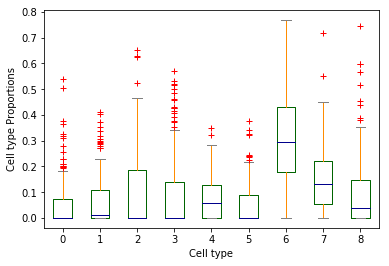

In [57]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
ax = HER2_temp.plot.box(color=color, sym='r+')
ax.set_xlabel("Cell type")
ax.set_ylabel("Cell type Proportions")

# Survival 

In [130]:
sur = HER2DF.loc[:, '0':'8']

In [131]:
sur.insert(0, 'DAYS_TO_DEATH', HER2DF.DAYS_TO_DEATH)

In [132]:
sur = sur.dropna(axis=0, how='any')

In [133]:
sur.DAYS_TO_DEATH.min()

116.0

In [134]:
sur.DAYS_TO_DEATH.max()

2207.0

In [135]:
sur.quantile([.25, .75])

,DAYS_TO_DEATH,0,1,2,3,4,5,6,7,8
0.25,792.0,0.000000,0.006346,0.000000,0.00000,0.000000,0.000000,0.228632,0.094744,0.000000
0.75,1488.5,0.054558,0.145282,0.321797,0.02005,0.140996,0.027176,0.431462,0.197011,0.110807


In [136]:
def mapping_daysToDeath(x):
    if (x <= 793): return 0
    elif (x <=1489): return 1
    else: return 2

In [137]:
sur['DD'] = sur.DAYS_TO_DEATH.apply(mapping_daysToDeath)

In [138]:
days0 = sur.loc[sur['DD'] == 0]

In [139]:
days0.set_index('DAYS_TO_DEATH', inplace=True)

In [140]:
days0.drop(columns=['DD'], inplace=True)

C:\Users\Neha Mane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(33,0.5,'Days to Death')

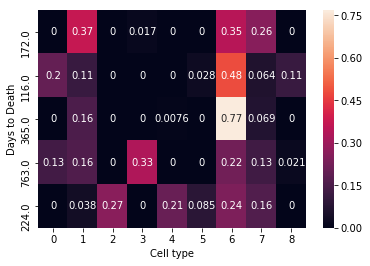

In [141]:
ax = sns.heatmap(days0, annot=True)
ax.set_xlabel("Cell type")
ax.set_ylabel("Days to Death")

In [142]:
days1 = sur.loc[sur['DD'] == 1]

In [143]:
days1.set_index('DAYS_TO_DEATH', inplace=True)

In [144]:
days1.drop(columns=['DD'], inplace=True)

C:\Users\Neha Mane\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(33,0.5,'Days to Death')

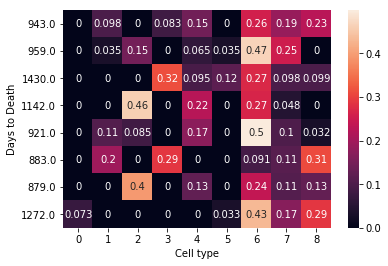

In [145]:
ax = sns.heatmap(days1, annot=True)
ax.set_xlabel("Cell type")
ax.set_ylabel("Days to Death")

In [146]:
days2 = sur.loc[sur['DD'] == 2]
days2.set_index('DAYS_TO_DEATH', inplace=True)
days2.drop(columns=['DD'], inplace=True)

C:\Users\Neha Mane\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Text(33,0.5,'Days to Death')

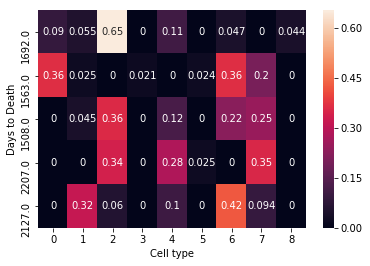

In [147]:
ax = sns.heatmap(days2, annot=True)
ax.set_xlabel("Cell type")
ax.set_ylabel("Days to Death")

# Healthy Patients

In [58]:
HealthyDF = pd.read_csv('CIBERSORT.Output_Job33.csv', sep=',')

In [59]:
HealthyDF.head()

,Input Sample,0,1,2,3,4,5,6,7,8,P-value,Pearson Correlation,RMSE
0,GTEX-1117F-2826-SM-5GZXL,0,0.06272,0.418983,0.159941,0.125015,0.000000,0.077580,0.155761,0.0,0.0,0.154578,1.169406
1,GTEX-111YS-1926-SM-5GICC,0,0.00000,0.350036,0.335290,0.122831,0.048968,0.074535,0.068340,0.0,0.0,0.165266,1.165780
2,GTEX-1122O-1226-SM-5H113,0,0.00000,0.322588,0.173319,0.102421,0.045735,0.156372,0.199565,0.0,0.0,0.178228,1.141630
3,GTEX-117XS-1926-SM-5GICO,0,0.00000,0.410090,0.134624,0.142091,0.044838,0.031373,0.236984,0.0,0.0,0.133122,1.183032
4,GTEX-117YX-1426-SM-5H12H,0,0.00000,0.127958,0.147830,0.178873,0.059507,0.181872,0.303961,0.0,0.0,0.113914,1.180969


In [60]:
HealthyDF.drop(columns=['P-value','Pearson Correlation', 'RMSE'], inplace=True)

Text(0,0.5,'Cell type proportions')

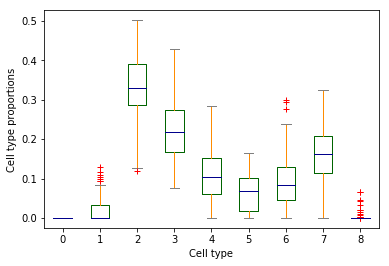

In [61]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
              medians='DarkBlue', caps='Gray')
ax = HealthyDF.plot.box(color=color, sym='r+')
ax.set_xlabel("Cell type")
ax.set_ylabel("Cell type proportions")

# ADASYN Sampling

In [32]:
used_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8']

In [33]:
ada = ADASYN(random_state=42)

In [34]:
X_res, y_res = ada.fit_sample(CibersortDF[used_features], CibersortDF['AJCC_PATHOLOGIC_TUMOR_STAGE'])

# SMOTE Sampling

In [64]:
sm = SMOTE(random_state=42)

In [65]:
X_res, y_res = sm.fit_sample(CibersortDF[used_features], CibersortDF['AJCC_PATHOLOGIC_TUMOR_STAGE'])

In [66]:
y_res

array([2, 3, 3, ..., 1, 1, 1], dtype=int64)

In [67]:
print(sorted(Counter(y_res).items()))

[(1, 624), (2, 624), (3, 624)]


# CNN with One hot encoding

In [418]:
#Y = CibersortDF['AJCC_PATHOLOGIC_TUMOR_STAGE']

In [85]:
Y = y_res

In [86]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
print(encoded_Y)

[1 2 2 ... 0 0 0]


In [87]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=9, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [88]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

In [89]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [91]:
results = cross_val_score(estimator, X_res, dummy_y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 44.66% (3.83%)


# Train test split + features 

In [293]:
#X_train, X_test = train_test_split(CibersortDF, test_size=0.2, random_state=42)

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Decision Tress 

In [68]:
dtree_model = DecisionTreeClassifier(max_depth = 8)

In [69]:
results = cross_val_score(dtree_model, X_res, y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 54.76% (4.01%)


In [543]:
#results = cross_val_score(dtree_model, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 48.58% (1.78%)


In [544]:
dtree_model.fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

In [545]:
print(accuracy_score(y_test, dtree_predictions))

0.5340599455040872


In [546]:
cm = confusion_matrix(y_test, dtree_predictions)
print(cm)

[[77 25 17]
 [24 63 25]
 [26 54 56]]


# Logistic Regression

In [70]:
lr = linear_model.LogisticRegression()

In [71]:
results = cross_val_score(lr, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 40.44% (0.99%)


In [548]:
#results = cross_val_score(lr, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 57.30% (2.29%)


In [549]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [550]:
#The estimated coefficients will all be around 1:
print(lr.coef_)

[[ 0.923273    0.16994434 -0.51971669 -0.45288372 -0.54044157 -1.86311353
  -0.19429152  2.20016769 -0.46871166 -0.36466274 -0.13501308  0.45150025
   0.17378628]
 [-0.57901132  0.15304544 -0.64329148  0.59210752  0.93812407  0.12419988
  -0.05851258 -1.00973263  0.06264886 -0.42109238 -0.23573154 -1.48496607
   2.10734298]
 [-0.44818304 -0.4139596   1.08183016 -0.29883726 -0.5922558   1.49925309
   0.14612084 -1.39198229  0.32726726  0.65329152  0.21935229  0.94070203
  -2.61472867]]


In [551]:
log_reg = lr.predict(X_test)

In [552]:
print(accuracy_score(y_test, log_reg))

0.44959128065395093


In [553]:
cm = confusion_matrix(y_test, log_reg)
print(cm)

[[52 44 23]
 [33 49 30]
 [36 36 64]]


In [74]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [75]:
#results = cross_val_score(mul_lr, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [76]:
results = cross_val_score(mul_lr, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 40.44% (1.12%)


In [556]:
mul_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [557]:
mul_log_reg = mul_lr.predict(X_test)

In [558]:
print(accuracy_score(y_test, mul_log_reg))

0.444141689373297


In [559]:
cm = confusion_matrix(y_test, log_reg)
print(cm)

[[52 44 23]
 [33 49 30]
 [36 36 64]]


# Random Forest

In [72]:
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [73]:
results = cross_val_score(clf, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 64.91% (2.85%)


In [561]:
#results = cross_val_score(clf, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 50.32% (1.29%)


In [518]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [519]:
result = clf.predict(X_test)

In [520]:
print(accuracy_score(y_test, result))

0.6906666666666667


In [521]:
pd.crosstab(y_test, result, rownames=['Actual Class'], colnames=['Predicted Class'])

Predicted Class,1,2,3
Actual Class,,,
1,98,23,6
2,23,79,17
3,15,32,82


In [522]:
list(zip(CibersortDF[used_features], clf.feature_importances_))

[('BC_01', 0.09126995307184232),
 ('BC_02', 0.07296305732852709),
 ('BC_03', 0.07310309777303382),
 ('BC_03LN', 0.08743520802722232),
 ('BC_04', 0.06364561709314809),
 ('BC_05', 0.10211168354722266),
 ('BC_06', 0.04859353757945763),
 ('BC_07', 0.09286484353738626),
 ('BC_07LN', 0.047913808645784386),
 ('BC_08', 0.09745676182118602),
 ('BC_09', 0.09208357798605667),
 ('BC_10', 0.07820368233172538),
 ('BC_11', 0.05235517125740734)]

In [333]:
#clf.fit(X_train[used_features], X_train['AJCC_PATHOLOGIC_TUMOR_STAGE'])

In [335]:
#result = clf.predict(X_test[used_features])

In [337]:
#print(accuracy_score(X_test['AJCC_PATHOLOGIC_TUMOR_STAGE'], result))

# Linear SVC

In [77]:
model = LinearSVC()

In [78]:
results = cross_val_score(model, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 40.65% (1.45%)


In [505]:
#results = cross_val_score(model, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 57.02% (2.43%)


In [343]:
model.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [345]:
model.score(X_train,y_train)

0.47962591850367403

In [347]:
predicted = model.predict(X_test)

In [349]:
print(accuracy_score(y_test, predicted))

0.44


In [351]:
conf_mat = confusion_matrix(y_test, predicted)
print(conf_mat)

[[52 33 42]
 [34 42 43]
 [31 27 71]]


In [340]:
#model = svm.SVC(kernel='linear', C=1, gamma=1, multi_class='ovr')

In [342]:
#model.fit(X_train[used_features],X_train['AJCC_PATHOLOGIC_TUMOR_STAGE'])

In [344]:
#model.score(X_train[used_features].values,X_train['AJCC_PATHOLOGIC_TUMOR_STAGE'])

In [346]:
#predicted = model.predict(X_test[])

In [348]:
#print(accuracy_score(X_test['AJCC_PATHOLOGIC_TUMOR_STAGE'], predicted))

# SVM Classifier

In [79]:
svm_model_linear = SVC(kernel = 'rbf', C = 10, gamma=10)

In [80]:
results = cross_val_score(svm_model_linear, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 60.63% (2.73%)


In [507]:
#results = cross_val_score(svm_model_linear, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 46.83% (2.94%)


In [480]:
svm_model_linear.fit(X_train,y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [355]:
svm_predictions = svm_model_linear.predict(X_test)

In [356]:
accuracy = svm_model_linear.score(X_test,y_test)
print(accuracy)

0.704


In [357]:
cm = confusion_matrix(y_test, svm_predictions)

In [358]:
print(cm)

[[107  10  10]
 [ 30  62  27]
 [  8  26  95]]


In [294]:
#svm_model_linear = SVC(kernel = 'rbf', C = 10, gamma=10).fit(X_train[used_features],X_train['AJCC_PATHOLOGIC_TUMOR_STAGE'])

In [295]:
#svm_predictions = svm_model_linear.predict(X_test[used_features])

In [296]:
#accuracy = svm_model_linear.score(X_test[used_features],X_test['AJCC_PATHOLOGIC_TUMOR_STAGE'])
#print(accuracy)

0.41284403669724773


# Naive Bayes Classifier

In [81]:
gnb = GaussianNB()

In [82]:
results = cross_val_score(gnb, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 42.58% (2.25%)


In [509]:
#results = cross_val_score(gnb, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 47.29% (3.81%)


In [360]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [361]:
y_pred = gnb.predict(X_test)

In [365]:
print(accuracy_score(y_test, y_pred))

0.464


In [366]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[57 23 47]
 [33 45 41]
 [37 20 72]]


In [113]:
#gnb.fit(X_train[used_features].values,X_train['AJCC_PATHOLOGIC_TUMOR_STAGE'])

GaussianNB(priors=None)

In [362]:
#y_pred = gnb.predict(X_test[used_features])

In [363]:
'''print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          X_test.shape[0],
          (X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum(),
          100*(1-(X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum()/X_test.shape[0])
))'''

'print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"\n      .format(\n          X_test.shape[0],\n          (X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum(),\n          100*(1-(X_test["AJCC_PATHOLOGIC_TUMOR_STAGE"] != y_pred).sum()/X_test.shape[0])\n))'

In [364]:
#print(accuracy_score(X_test['AJCC_PATHOLOGIC_TUMOR_STAGE'], y_pred))

# KNN

In [83]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [84]:
results = cross_val_score(knn, X_res,y_res, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 64.10% (1.92%)


In [511]:
#results = cross_val_score(knn, CibersortDF[used_features], Y, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 49.13% (1.96%)


In [483]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [484]:
accuracy = knn.score(X_test, y_test)
print(accuracy)

0.648


In [485]:
knn_predictions = knn.predict(X_test) 

In [486]:
print(accuracy_score(y_test, knn_predictions))

0.648


In [387]:
cm = confusion_matrix(y_test, knn_predictions)

In [388]:
print(cm)

[[115   6   6]
 [ 46  44  29]
 [ 16  29  84]]


# Box plot

In [5]:
df = pd.read_csv('result.csv', sep=',')

In [6]:
df.head()

,Classifier,Accuracy
0,LR,39.00
1,RF,63.18
2,SVC,39.00
3,SVM,61.82
4,KNN,60.90


[Text(0,0,'LR'),
 Text(0,0,'RF'),
 Text(0,0,'SVC'),
 Text(0,0,'SVM'),
 Text(0,0,'KNN'),
 Text(0,0,'NB'),
 Text(0,0,'CNN'),
 Text(0,0,'DT')]

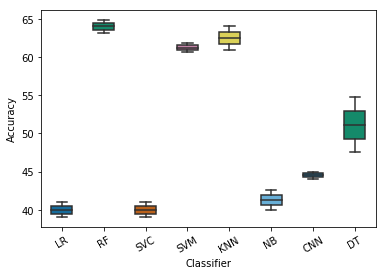

In [7]:
bplot = sns.boxplot(y='Accuracy', x='Classifier', 
                 data=df, 
                 width=0.5,
                 palette="colorblind")
bplot.set_xticklabels(bplot.get_xticklabels(),rotation=30)

# End

# Other Trials

# Linear Regression and Cross Validation Plot 

In [368]:
lr = linear_model.LinearRegression()

In [191]:
#X = X_train[used_features]
#y = X_train['AJCC_PATHOLOGIC_TUMOR_STAGE']

In [369]:
predicted = cross_val_predict(lr, X_train , y_train, cv=10)

In [373]:
'''fig, ax = plt.subplots()
ax.scatter(y_train, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()'''

"fig, ax = plt.subplots()\nax.scatter(y_train, predicted, edgecolors=(0, 0, 0))\nax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)\nax.set_xlabel('Measured')\nax.set_ylabel('Predicted')\nplt.show()"

# Predict Days to Death

In [192]:
ClinicalDF.shape

(1105, 109)

In [193]:
ClinicalDF = ClinicalDF.fillna(ClinicalDF.mean()).dropna(axis=1, how='all')

In [194]:
CibersortDF.shape

(1101, 17)

In [195]:
CibersortDF = CibersortDF.rename(index=str, columns={"Input Sample": "CASE_ID"})

In [196]:
joined_df = ClinicalDF.merge(CibersortDF, on='CASE_ID', how='inner')

In [197]:
joined_df.DAYS_TO_DEATH.unique()

array([1640.27102804,  172.        , 1174.        ,  991.        ,
       2551.        , 2798.        ,  785.        ,  943.        ,
        959.        , 1692.        , 1920.        ,  754.        ,
        749.        , 2373.        ,  860.        , 2965.        ,
       2573.        , 1542.        , 1927.        ,  825.        ,
       4267.        , 1688.        ,  558.        , 1034.        ,
        573.        , 3462.        ,  116.        , 1993.        ,
        426.        , 3063.        ,  811.        , 1759.        ,
       2520.        , 2712.        , 1388.        , 2361.        ,
       3669.        , 4456.        ,  365.        , 3461.        ,
       1430.        , 1563.        , 2483.        , 2469.        ,
        612.        ,  239.        , 2854.        ,  160.        ,
       2009.        , 1009.        , 1508.        , 1142.        ,
        571.        ,  322.        , 3736.        , 1642.        ,
       2273.        , 1032.        , 3941.        , 2097.     

In [198]:
ClinicalDF = joined_df.loc[:,'CASE_ID':'VITAL_STATUS']

In [199]:
CibersortDF = joined_df.loc[:,'BC_01':'BC_11']

In [200]:
CibersortDF.insert(0, 'CASE_ID', joined_df.iloc[:,1])

In [201]:
CibersortDF.insert(1, 'DAYS_TO_DEATH', joined_df.iloc[:,14])

In [202]:
CibersortDF.head()

,CASE_ID,DAYS_TO_DEATH,BC_01,BC_02,BC_03,BC_03LN,BC_04,BC_05,BC_06,BC_07,BC_07LN,BC_08,BC_09,BC_10,BC_11
0,TCGA-A7-A3J0,1640.271028,0.354303,0.000000,0.000000,0.230454,0.031201,0.186856,0.000000,0.000000,0.0,0.000000,0.197185,0.000000,0.000000
1,TCGA-OL-A66N,1640.271028,0.193336,0.000000,0.000000,0.076339,0.000000,0.099043,0.302135,0.045239,0.0,0.262130,0.000000,0.021778,0.000000
2,TCGA-AQ-A0Y5,172.000000,0.048833,0.000000,0.128816,0.027748,0.250986,0.236943,0.000000,0.027265,0.0,0.200007,0.000000,0.079402,0.000000
3,TCGA-E9-A22H,1640.271028,0.175054,0.221322,0.000000,0.184788,0.000000,0.267790,0.000000,0.007576,0.0,0.000000,0.124782,0.000000,0.018688
4,TCGA-BH-A0EB,1640.271028,0.154803,0.048877,0.000000,0.138262,0.000000,0.052319,0.000000,0.147567,0.0,0.166245,0.291928,0.000000,0.000000


In [203]:
X_train, X_test = train_test_split(CibersortDF, test_size=0.3, random_state=42)

In [204]:
lr = linear_model.LinearRegression()

In [205]:
X = X_train[used_features]
y = X_train['DAYS_TO_DEATH']

In [206]:
predicted = cross_val_predict(lr, X , y, cv=10)

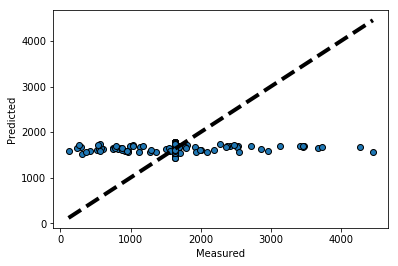

In [209]:
fig, ax = plt.subplots()
ax.scatter(y, predicted, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()